## End-to-End SciKit-Learn Workflow.

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###### 1. Importing heart diease dataset

In [2]:
heart_diease = pd.read_csv("D:\\TUTORIALS\\Exercise Files - Complete Machine Learning and Data Science Zero to Mastery\\4- Matplotlib/heartdiease.csv")

In [3]:
heart_diease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create features/predictors set
X = heart_diease.drop('target', axis=1)

# Create target/labels set
Y = heart_diease['target']

###### 2. Choose the right model and hyperparameters

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf = RandomForestClassifier(n_estimators=100)

In [7]:
# keeping default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

###### 3. Fit the model on the training data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# Make prediction
y_predict = clf.predict(X_test)

In [12]:
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [13]:
y_test

217    0
67     1
263    0
250    0
204    0
      ..
187    0
181    0
58     1
68     1
89     1
Name: target, Length: 61, dtype: int64

###### 4. Evaluate the model

In [14]:
# on training data
clf.score(X_train, y_train)

1.0

In [15]:
# on test data
clf.score(X_test, y_test)

0.8524590163934426

In [16]:
# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [18]:
print(confusion_matrix(y_test, y_predict))

[[22  6]
 [ 3 30]]


In [19]:
print(accuracy_score(y_test, y_predict))

0.8524590163934426


###### 5. Imporve the model

In [20]:
# Try different number of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators..')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%', end='\n\n')

Trying model with 10 estimators..
Model accuracy on test set: 83.61%

Trying model with 20 estimators..
Model accuracy on test set: 86.89%

Trying model with 30 estimators..
Model accuracy on test set: 85.25%

Trying model with 40 estimators..
Model accuracy on test set: 80.33%

Trying model with 50 estimators..
Model accuracy on test set: 83.61%

Trying model with 60 estimators..
Model accuracy on test set: 80.33%

Trying model with 70 estimators..
Model accuracy on test set: 90.16%

Trying model with 80 estimators..
Model accuracy on test set: 86.89%

Trying model with 90 estimators..
Model accuracy on test set: 88.52%



###### 6. Save the model and load it

In [21]:
import pickle

In [22]:
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [23]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))

In [24]:
loaded_model.score(X_test, y_test)

0.8852459016393442

# Step by Step breakdown of SciKit-Learn workflow

### 1. Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [25]:
heart_diease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = heart_diease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y = heart_diease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

###### Splitting data into training and test sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((242, 13), (61, 13), (61,), (242,))

###### Make sure all data is numerical

In [31]:
car_sales = pd.read_csv("D:\\TUTORIALS\\Exercise Files - Complete Machine Learning and Data Science Zero to Mastery\\5- Scikit Learn/car-sales-extended.csv")

In [32]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
len(car_sales)

1000

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Building the model:
from sklearn.ensemble import RandomForestRegressor

In [38]:
model = RandomForestRegressor()
#model.fit(X_train, y_train) #UNCOMMENT IN FINAL SAVE OF NOTEBOOK COMPLETION
#model.score() #UNCOMMENT IN FINAL SAVE OF NOTEBOOK COMPLETION

###### METHOD 1

In [39]:
# Truning the categories into numbers
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [41]:
categorical_features = ['Make', 'Colour', 'Doors']


In [42]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                                remainder='passthrough')

In [43]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [44]:
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [45]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


###### METHOD 2

In [46]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [47]:
# Refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [48]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
model.score(X_test, y_test)

0.30431565439836705

###### Check for Missing Values

1- Fill missing values with some data (also known as imputation). <br>
2- Remove the samples with missing data altogether.

In [50]:
# Importing car sales missing data
car_sales_missing = pd.read_csv("D:\\TUTORIALS\\Exercise Files - Complete Machine Learning and Data Science Zero to Mastery\\5- Scikit Learn/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Creating X and Y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [53]:
#UNCOMMENT IN FINAL SAVE OF NOTEBOOK COMPLETION

# Lets try to convert to numbers
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([('one_hot',
#                                 one_hot,
#                                 categorical_features)],
#                                 remainder='passthrough')

# transformed_X = transformer.fit_transform(X)
#transformed_X

Fill missing data with Pandas

In [54]:
# Filling 'Make' column:
car_sales_missing['Make'].fillna('missing', inplace=True)

# Filling 'Colour' column:
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Filling 'Odometer (KM)' column:
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Filling 'Doors' column:
car_sales_missing['Doors'].fillna(4, inplace=True)

In [55]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [56]:
# Removing row with missing Price value
car_sales_missing.dropna(inplace=True)

In [57]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [58]:
# Creating X and Y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [59]:
# Lets try to convert to numbers
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                                remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

###### Fill missing values with SciKit-Learn

Note: This section is different to the video. The video shows filling and transforming the entire dataset (X) and although the techniques are correct, it's best to fill and transform training and test sets separately (as shown in the code below).

The main takeaways:

Split your data first (into train/test)
Fill/transform the training set and test sets separately

In [60]:
car_sales_missing = pd.read_csv("D:\\TUTORIALS\\Exercise Files - Complete Machine Learning and Data Science Zero to Mastery\\5- Scikit Learn/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [61]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
# dropping rows with no label/target values
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isnull().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [64]:
# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [67]:
# Filling categorical values with 'missings' and numerical values with 'mean'
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

#Create an Imputer (filling missing values)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

#Transform the data
# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [68]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [69]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [70]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [71]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
model.score(transformed_X_test, y_test)

0.18353518122423973

### 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

Classification - predicting whether a sample is one thing or another
Regression - predicting a number

###### Picking estimator for the regression problem:

In [73]:
# Boston housing data set
from sklearn.datasets import load_boston

In [74]:
boston = load_boston()

In [75]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [76]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
len(boston_df)

506

In [78]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [79]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [80]:
boston_df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
target     506
dtype: int64

*Trying Ridge Regression Model:*

In [81]:
from sklearn.linear_model import Ridge

np.random.seed(42)

#Creating data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

#Splitting into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
#Ridge model
model = Ridge()
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
#Checking score
model.score(X_test, y_test)

0.6662221670168519

*Trying Random Forest Regressor*

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
np.random.seed(42)

#Creating data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

#Splitting into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Random Forest model
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)

#Checking score
model_rf.score(X_test, y_test)

0.873969014117403

##### Choosing estimator for Classification:

In [86]:
heart_diease = pd.read_csv("D:\\TUTORIALS\\Exercise Files - Complete Machine Learning and Data Science Zero to Mastery\\5- Scikit Learn/heart-disease.csv")

In [87]:
heart_diease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


*Trying Linear SVC:*

In [88]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
lin_svc = LinearSVC(max_iter=10000)

In [90]:
#Fitting the model
lin_svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [91]:
#Evaluating
lin_svc.score(X_test, y_test)

0.8360655737704918

In [92]:
heart_diease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

*Trying Ensemble Classifier:*

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rf_clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

### 3. Fit the model to data and using it to make predictions

Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

###### 3.1 Fitting a model to data

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the fit() method and passing it data, such as, fit(X, y).

Where X is a feature array and y is a target array.

Other names for X include: <br>
Data <br>
Feature variables <br>
Features <br>

Other names for y include: <br>
Labels <br>
Target variable <br>

For supervised learning there is usually an X and y. For unsupervised learning, there's no y (no labels).

In [95]:
#Importing Estimator
from sklearn.ensemble import RandomForestClassifier

#Setting random seed
np.random.seed(42)

#Making the data
X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiating the model
rf_clf = RandomForestClassifier(n_estimators=100)

#Fitting the model
rf_clf.fit(X_train, y_train)

#Evaluating the model
rf_clf.score(X_test, y_test)

0.8524590163934426

###### 3.2 Making predictions using a machine learning model
Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways. Two of the most common and useful are predict() and predict_proba().

In [96]:
# Use a trained model to make predictions
rf_clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [97]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [98]:
# Compare prediction to truth labels to evaluate model
y_preds = rf_clf.predict(X_test)

np.mean(y_preds == y_test)

0.8524590163934426

In [99]:
rf_clf.score(X_test, y_test)

0.8524590163934426

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test, y_preds)

0.8524590163934426

*__Making prediction using predict_proba__*

*Retruns probabilities of the classifiction model*

In [102]:
rf_clf.predict_proba(X_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [103]:
# Now using predict()
rf_clf.predict(X_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

###### predict() can also be used for regression model:

In [104]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate model
rf_reg = RandomForestRegressor(n_estimators=100)

#Fitting the model
rf_reg.fit(X_train, y_train)

#Making prediction:
y_preds = rf_reg.predict(X_test)

In [105]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [106]:
np.array([y_test[:10]])

array([[23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8]])

In [107]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

In [108]:
mean_absolute_error(y_test, y_preds)

2.1226372549019623

### 4. Evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/esitmators:

Estimator score method <br>
The scoring parameter  <br>
Problem-specific metric functions.

###### 4.1 Evaluating a model with the score method

In [109]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
clf.score(X_test, y_test)

0.8524590163934426

In [111]:
clf.score(X_train, y_train)

1.0

In [112]:
#Doing same with regression:

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [113]:
rf_reg.score(X_test, y_test)

0.5106393318965518

###### 4.2 Evaluating a model using the scoring parameter

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
clf.score(X_test, y_test)

0.8524590163934426

In [117]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [118]:
np.random.seed(42)

#Single training/test split score
clf_single_score = clf.score(X_test, y_test)

#Take mean of 5-fold cross_val_score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [119]:
#Scoring parameter set to none by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

###### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

__Accuracy__

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [121]:
np.random.seed(42)

X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [122]:
np.mean(cross_val_score)

0.8248087431693989

In [123]:
print(f'Heart Diease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Diease Classifier Cross-Validated Accuracy: 82.48%


__Area under ROC curve__

Receiver Operator Characteristic (ROC) <br>
Area Under Curve (AUC) <br>

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

True positive = model predicts 1 when truth is 1 <br>
False positive = model predicts 1 when truth is 0 <br>
True negative = model predicts 0 when truth is 0 <br>
False negative = model predicts 0 when truth is 1 <br>

In [124]:
from sklearn.metrics import roc_curve

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [126]:
# Fiting the model
clf.fit(X_train, y_train)

# Making predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [127]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [128]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positives
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

*Plotting the ROC-Curve*

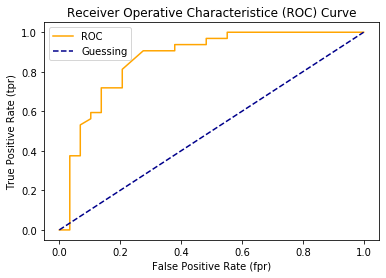

In [129]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot  roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operative Characteristice (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [130]:
from sklearn.metrics import roc_auc_score

In [131]:
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

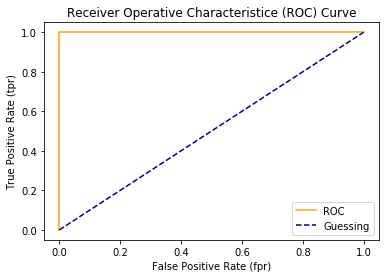

In [132]:
# Plot perfet ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [133]:
# Plot AUC score
roc_auc_score(y_test, y_test)

1.0

__Confusion Matrix__

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [136]:
# Visualize Confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [137]:
# Make a confusion matrix more visual with seaborn heatmap
import seaborn as sns

sns.set(font_scale=1.5)

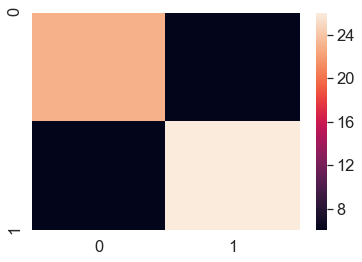

In [138]:
conf_mat = confusion_matrix(y_test, y_preds)

# Plotting
sns.heatmap(conf_mat);

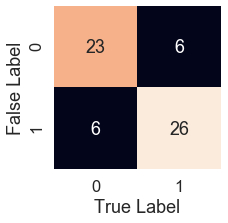

In [139]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using Seaborn heatmmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('False Label')
    
    # Fixing broken annotation
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(conf_mat)

In [140]:
#UNCOMMENT AFTER FINAL SAVE OF NOTEBOOK

#from sklearn.metrics import plot_confusion_matrix

__Classification Report__

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's classification_report() function.

In [141]:
from sklearn.metrics import classification_report

In [142]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* __Precision__ - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* __Recall__ - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* __F1 score__ - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* __Support__ - The number of samples each metric was calculated on.
* __Accuracy__ - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* __Macro avg__ - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* __Weighted avg__ - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [143]:
# Where precision and recall become valuable
diease_true = np.zeros(10000)
diease_true[0] = 1 # only one positive case

diease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(diease_true,
                                  diease_preds,
                                  output_dict=True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


##### 4.2.2 Evaluating a Regression Model

1. *R^2 (pronounced r-squared) or coefficient of determination* - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
2. *Mean absolute error (MAE)* - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. *Mean squared error (MSE)* - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [144]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [145]:
rf_reg.score(X_test, y_test)

0.873969014117403

__r2_score__

In [146]:
from sklearn.metrics import r2_score

In [147]:
# Fill array with y_tests mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [148]:
y_test.mean()

21.488235294117654

In [149]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [150]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [151]:
r2_score(y_test, y_test)

1.0

__Mean Absolute Error (MAE)__

MAE is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [152]:
from sklearn.metrics import mean_absolute_error

In [153]:
y_preds = rf_reg.predict(X_test)

In [154]:
mae = mean_absolute_error(y_test, y_preds)

In [155]:
mae

2.1226372549019623

In [156]:
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_preds})

df['differences'] = df['predicted values'] - df['actual values']

df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


__Mean Squared Error__

In [157]:
from sklearn.metrics import mean_squared_error

In [158]:
y_preds = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_preds)

mse

9.242328990196082

In [159]:
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_preds})

df['differences'] = df['predicted values'] - df['actual values']

df['differences square'] = np.square(df['differences'])

df

,actual values,predicted values,differences,differences square
173,23.6,23.002,-0.598,0.357604
274,32.4,30.826,-1.574,2.477476
491,13.6,16.734,3.134,9.821956
72,22.8,23.467,0.667,0.444889
452,16.1,16.853,0.753,0.567009
...,...,...,...,...
412,17.9,13.030,-4.870,23.716900
436,9.6,12.490,2.890,8.352100
411,17.2,13.406,-3.794,14.394436
86,22.5,20.219,-2.281,5.202961


In [160]:
squared = np.square(df['differences'])
squared.mean()

9.24232899019608

###### 4.2.3 Finally using Scoring parameter

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [162]:
np.random.seed(42)

X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

random_clf = RandomForestClassifier(n_estimators=100)

*Accuracy*

In [163]:
np.random.seed(42)
cv_acc = cross_val_score(random_clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [164]:
# Cross-Validated accuracy
print(f'The Cross- Validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The Cross- Validated accuracy is: 82.48%


In [165]:
np.random.seed(42)
cv_acc = cross_val_score(random_clf, X, y, cv=5, scoring='accuracy')
print(f'The Cross- Validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The Cross- Validated accuracy is: 82.48%


*Precision*

In [166]:
np.random.seed(42)
cv_precision = cross_val_score(random_clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [167]:
np.mean(cv_precision)

0.8329547346025924

In [168]:
np.random.seed(42)
cv_precision = cross_val_score(random_clf, X, y, cv=5, scoring='precision')
print(f'The Cross- Validated precision is: {np.mean(cv_precision)*100:.2f}%')

The Cross- Validated precision is: 83.30%


*Recall*

In [169]:
np.random.seed(42)
cv_recall = cross_val_score(random_clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [170]:
np.mean(cv_recall)

0.8545454545454545

In [171]:
np.random.seed(42)
cv_recall = cross_val_score(random_clf, X, y, cv=5, scoring='recall')
print(f'The Cross- Validated recall is: {np.mean(cv_recall)*100:.2f}%')

The Cross- Validated recall is: 85.45%


*f1*

In [172]:
np.random.seed(42)
cv_f1 = cross_val_score(random_clf, X, y, cv=5, scoring='f1')
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [173]:
np.mean(cv_f1)

0.8426854603423346

In [174]:
np.random.seed(42)
cv_f1 = cross_val_score(random_clf, X, y, cv=5, scoring='f1')
print(f'The Cross- Validated f1 is: {np.mean(cv_f1)*100:.2f}%')

The Cross- Validated f1 is: 84.27%


*__On the regression model__*

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [176]:
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

random_reg = RandomForestRegressor(n_estimators=100)

*r2*

In [177]:
np.random.seed(42)

cv_r2 = cross_val_score(random_reg, X, y, cv=5, scoring='r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [178]:
np.mean(cv_r2)

0.622375083951403

*mean absolute error*

In [179]:
np.random.seed(42)

cv_mae = cross_val_score(random_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [180]:
np.mean(cv_mae)

-3.0314302853814783

*mean squared error*

In [181]:
np.random.seed(42)

cv_mse = cross_val_score(random_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse

array([ -7.99104182, -12.88009356, -20.06894699, -45.70549288,
       -19.77049657])

In [182]:
np.mean(cv_mse)

-21.283214366686064

###### 4.3 Using different evalution metrics as Scikit-Learn functions

*Classification Evaluation*

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [184]:
np.random.seed(42)

X = heart_diease.drop('target', axis=1)
y = heart_diease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_model = RandomForestClassifier(n_estimators=100)

clf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
y_preds = clf_model.predict(X_test)

In [186]:
# Evaluating the model
print('Classifier metrics on the test set', end='\n\n')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%', end='\n\n')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%', end='\n\n')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%', end='\n\n')
print(f'f1_score: {f1_score(y_test, y_preds)*100:.2f}%', end='\n\n')

Classifier metrics on the test set

Accuracy: 85.25%

Precision: 84.85%

Recall: 87.50%

f1_score: 86.15%



*Regression Evaluation*

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [188]:
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg_model = RandomForestRegressor(n_estimators=100)

reg_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [189]:
y_preds = reg_model.predict(X_test)

In [190]:
# Evaluating the model
print('Regression metrics on the test set', end='\n\n')
print(f'r2_score: {r2_score(y_test, y_preds)*100:.2f}%', end='\n\n')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_preds)*100:.2f}%', end='\n\n')
print(f'Mean Square Error: {mean_squared_error(y_test, y_preds)*100:.2f}%', end='\n')

Regression metrics on the test set

r2_score: 87.40%

Mean Absolute Error: 212.26%

Mean Square Error: 924.23%


### 5. Improving the Model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [191]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [192]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 5.1 Tuning Hyperparameters by Hand

Making training, validation and testing sets

We're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [208]:
def evaluate_preds_clf(y_true, y_preds):
    """
    Performs the evaluation of y_true labels vs. y_pred labels.
    On a Classification model
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f'Accuracy: {accuracy * 100:.2f}%', end='\n')
    print(f'Precision: {precision:.2f}', end='\n')
    print(f'Recall: {recall:.2f}', end='\n')
    print(f'f1: {f1:.2f}', end='\n')
    
    return metric_dict

In [194]:
heart_diease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [195]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

In [196]:
# Shuffle the data
heart_diease_shuffled = heart_diease.sample(frac=1)

# Split into X & y
X = heart_diease_shuffled.drop('target', axis=1)
y = heart_diease_shuffled['target']

# Split the data into train, validate and test sets
train_split = round(0.7 * len(heart_diease_shuffled)) #70% data
valid_split = round(train_split + 0.15 * len(heart_diease_shuffled)) #15% data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:] 

(212, 45, 46)

In [197]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [198]:
clf = RandomForestClassifier()

In [199]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [209]:
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate on the validation set
baseline_metrics = evaluate_preds_clf(y_valid, y_preds)
baseline_metrics

Accuracy: 80.00%
Precision: 0.81
Recall: 0.84
f1: 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

In [211]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)

clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate
clf_2_metrics = evaluate_preds_clf(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
f1: 0.84


In [212]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)

clf_3.fit(X_train, y_train)

# Make predictions
y_preds_3 = clf_3.predict(X_valid)

# Evaluate
clf_3_metrics = evaluate_preds_clf(y_valid, y_preds_3)

Accuracy: 80.00%
Precision: 0.81
Recall: 0.84
f1: 0.82


##### 5.2 Tuning hyperparameters by RandomSearchCV

In [213]:
from sklearn.model_selection import RandomizedSearchCV

In [216]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ['auto', 'sqrt'],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_diease_shuffled.drop('target', axis=1)
y = heart_diease_shuffled['target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Classifier
clf = RandomForestClassifier(n_jobs=1)

# Setting up RandomizedSearchCV
ra_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, #number of models to try
                           cv=5,
                           verbose=2)

In [217]:
#Fit the RandomizedSearchCV
ra_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=1000, min_samples_split=4, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

In [218]:
ra_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [219]:
# Make predictions with the best hyperparameters
ra_y_preds = ra_clf.predict(X_test)

# Evaluate
ra_metrics = evaluate_preds_clf(y_test, ra_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
f1: 0.81


##### 5.3 Tuning hyperparameters with GridSearchCV

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [223]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [225]:
np.random.seed(42)

# Split into X & y
X = heart_diease_shuffled.drop('target', axis=1)
y = heart_diease_shuffled['target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Classifier
clf = RandomForestClassifier(n_jobs=1)

# Setting up RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

In [226]:
#Fit the RandomizedSearchCV
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [227]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [228]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate
gs_metrics = evaluate_preds_clf(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
f1: 0.78


*Let's compare our different models metrics.*

In [229]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": ra_metrics,
                               "grid search": gs_metrics})

compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.80,0.82,0.82,0.79
precision,0.81,0.84,0.77,0.74
recall,0.84,0.84,0.86,0.82
f1,0.82,0.84,0.81,0.78


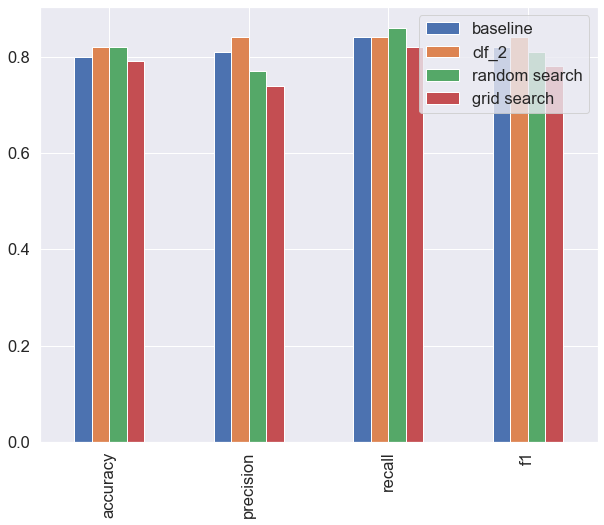

In [234]:
compare_metrics.plot.bar(figsize=(10,8));

*Tidbit:*

As always, when comparing models, you should be careful to make sure they're compared on the same splits of data.

For example, let's say you have model_1 and model_2 which each differ slightly.

If you want to compare and evaluate their results, model_1 and model_2 should both be trained on the same data (e.g. X_train and y_train) and their predictions should each be made on the same data.

### 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's pickle module
2. With the joblib module

###### 6.1 Saving and Loading using Pickle

We'll use pickle's dump() function and pass it our model, gs_clf, along with the open() function containing a string for the filename we want to save our model as, along with the "wb" string which stands for "write binary", which is the file type open() will write our model as.<br>
Once it's saved, we can import it using pickle's load() function, passing it open() containing the filename as a string and "rb" standing for "read binary".<br>
Once you've reimported your trained model using pickle, you can use it to make predictions as usual.<br>
You'll notice the reimported model evaluation metrics are the same as the model before we exported it.<br>

In [235]:
import pickle

In [236]:
# Save an existing model to file
pickle.dump(gs_clf, open("gs_randomforest_model_1.pkl", "wb"))

In [237]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_randomforest_model_1.pkl", "rb"))

In [238]:
np.random.seed(42)

# Split into X & y
X = heart_diease_shuffled.drop('target', axis=1)
y = heart_diease_shuffled['target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [239]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds_clf(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
f1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

###### 6.2 Saving and Loading using Joblib

To save a model, we can use joblib's dump() function, passing it the model (gs_clf) and the desired filename.<br>
Once you've saved a model using dump(), you can import it using load() and passing it the filename of the model.<br>
Again, once imported, we can make predictions with our model.<br>

In [240]:
import joblib

In [241]:
# Saving model
joblib.dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [242]:
# Load saved model
loaded_joblib_model = joblib.load(filename='gs_random_forest_model_1.joblib')

In [243]:
# Make prediction with loaded model
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds_clf(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
f1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

__Which one should you use, pickle or joblib?__

According to Scikit-Learn's documentation, they suggest it may be more efficient to use joblib as it's more efficient with large numpy array (which is what may be contained in trained/fitted Scikit-Learn models).

Either way, they both function fairly similar so deciding on which one to use, shouldn't cause too much of an issue.

### 7. Putting it altoghether

To tidy things up, we'll be using Scikit-Learn's Pipeline class. You can imagine Pipeline as being a way to string a number of different Scikit-Learn processes together.

###### Creating a Regression Pipeline

In [246]:
data = pd.read_csv("D:\\TUTORIALS\\Exercise Files - Complete Machine Learning and Data Science Zero to Mastery\\5- Scikit Learn/car-sales-extended-missing-data.csv")

In [247]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [248]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [249]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps to do all in one cell:
1. Fill the missing data
2. Convert data in to numbers
3. Build the model

In [254]:
# Getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data
data = pd.read_csv("D:\\TUTORIALS\\Exercise Files - Complete Machine Learning and Data Science Zero to Mastery\\5- Scikit Learn/car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'], inplace=True)

# Define different features and tranformer
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ['Doors']
door_tranformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_tranformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))])

# Setup preprocessing steps(fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("doors", door_tranformer, door_feature),
    ("num", numeric_tranformer, numeric_features)
])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model", RandomForestRegressor())])

# Split the data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1821575815702311

It's also possible to GridSearchCV or RandomizedSearchCV with a Pipeline.<br>
The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter.<br>
The prefix is the name of the Pipeline step you'd like to alter, followed by two underscores.<br>
For example, to adjust n_estimators of "model" in the Pipeline, you'd use: "model__n_estimators".<br>

In [256]:
# Use GridSearchCV with regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   0.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   47.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [257]:
gs_model.score(X_test, y_test)

0.3337859800130589